# <center>DATA AND SAMPLING DISTRIBUTION</center>

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
loans_income = pd.read_csv('./Dataset/loans_income.csv')

In [27]:
sp500_px = pd.read_csv('./Dataset/sp500_px.txt')

In [28]:
loans_income.shape

(50000, 1)

In [29]:
sp500_px.shape

(5647, 518)

In [30]:
loans_sample = loans_income.sample(n=1000)

In [31]:
loans_sample.shape

(1000, 1)

In [32]:
loans_sample.head()

,x
46735,45000
47292,45000
5991,62000
27169,68000
32304,39000


In [33]:
#mean of 5 numbers
sample_mean_5 = loans_sample.rolling(5).mean().x

In [34]:
sample_mean_5

46735        NaN
47292        NaN
5991         NaN
27169        NaN
32304    51800.0
          ...   
40153    58800.0
25169    51200.0
22022    60200.0
36147    72200.0
30879    94200.0
Name: x, Length: 1000, dtype: float64

In [35]:
sample_mean_5 = sample_mean_5.dropna()

In [36]:
sample_mean_5

32304    51800.0
9896     46000.0
28199    45200.0
10267    44300.0
1466     43300.0
          ...   
40153    58800.0
25169    51200.0
22022    60200.0
36147    72200.0
30879    94200.0
Name: x, Length: 996, dtype: float64

In [37]:
#mean of 20 numbers
sample_mean_20 = loans_income.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()



In [38]:
sample_mean_20

19       71966.6
20       70116.6
21       71516.6
22       68516.6
23       68578.5
          ...   
49995    85425.0
49996    84475.0
49997    82975.0
49998    84575.0
49999    84675.0
Name: x, Length: 49981, dtype: float64

In [39]:
# mean of 30 numbers
sample_mean_30 = loans_income.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

In [40]:
sample_mean_30

29       67244.333333
30       69211.000000
31       69599.000000
32       67599.000000
33       70073.600000
             ...     
49995    79880.066667
49996    79720.066667
49997    79386.733333
49998    81520.066667
49999    81620.066667
Name: x, Length: 49971, dtype: float64

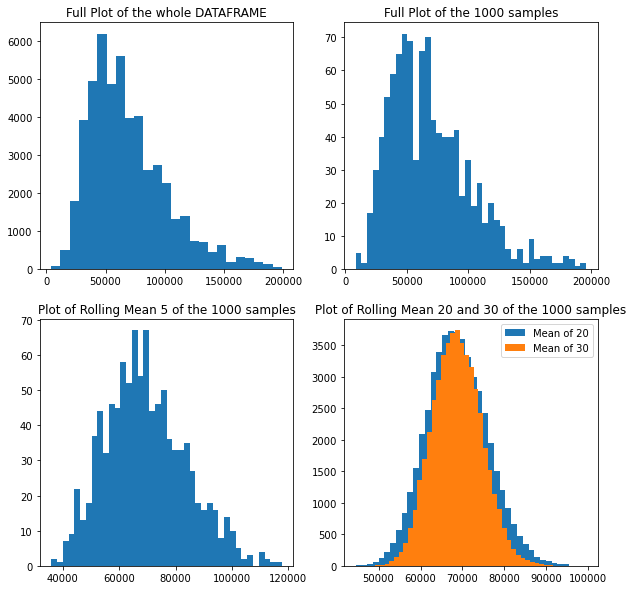

In [45]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(loans_sample.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')

ax.legend()
plt.show()

### Population stats

In [46]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


### Bootstrapping for 1000,10000,20000 Samples

In [47]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)

In [53]:
bootstrap_1000[:10]

array([ 67600,  72000,  60000, 120000,  95000,  32000,  60000,  30280,
        95000,  80000], dtype=int64)

In [50]:
bootstrap_10000

array([ 35000,  38000, 120000, ...,  39048,  60000, 120000], dtype=int64)

In [54]:
bootstrap_20000[:10]

array([ 23500,  82000,  34000, 144000,  75000,  50000, 109600,  30000,
       106000, 110000], dtype=int64)

In [55]:
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [57]:
arr_bootstraps

[array([ 67600,  72000,  60000, 120000,  95000,  32000,  60000,  30280,
         95000,  80000,  73000,  39000,  10000,  49000,  48000,  19000,
         70000,  45000,  63300,  30000, 105000,  50000,  45000,  73000,
         60000,  37000,  57600, 108000,  40000,  70000,  79900,  53000,
         51000,  63800,  60000, 120000,  80000,  44140,  29000, 120000,
         40800,  86400,  80300,  55000,  68000,  32000,  63000,  43940,
         31590,  49630,  75000, 100000,  69000, 103000,  33000, 125000,
         47520,  46000, 100000,  55000,  34272,  56600,  65000,  57000,
         78000,  38000, 170000,  24000,  53000,  64000,  95000,  35000,
         79857,  56522,  80000,  24000,  53000,  70000,  62000,  60000,
         45000,  44000,  50000,  45000, 110000,  47900,  91000,  40000,
        110000,  73000, 151000,  75000, 114000, 122000,  57000,  99700,
         78000,  80000,  58000,  42000,  30000,  60000,  98004,  85000,
         68000,  36000,  30280,  55000, 110000, 160000,  30000, 

In [58]:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32413.296512548277
Bootstrap Mean :  67394.706
Bootstrap Median:  60000.0
Boostrap Bias,  1365.8124399999942
Standard Error: 1024.9984345404505

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32756.44489367547
Bootstrap Mean :  68522.7577
Bootstrap Median:  61900.0
Boostrap Bias,  237.7607399999979
Standard Error: 327.56444893675473

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  33008.37781362745
Bootstrap Mean :  68688.49535
Bootstrap Median:  61000.0
Boostrap Bias,  72.02309000000241
Standard Error: 233.40447787983553

-----

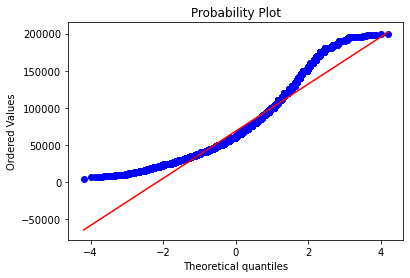

In [60]:
stats.probplot(loans_income.x, dist="norm", plot=pylab)
pylab.show()

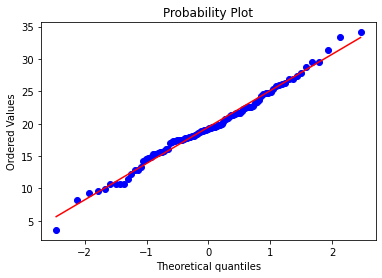

In [61]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

#### Second Datasets.

In [72]:
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [69]:
shapes = sp500_px.shape

In [70]:
shapes

(5647, 518)

In [73]:
nflx = sp500_px.loc[:,'NFLX']

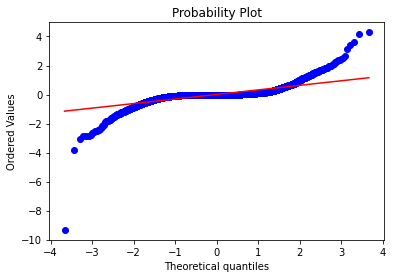

C:\Users\karan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\karan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\karan\anaconda3\lib\site-packages\numpy\lib\function_base.py:1281: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


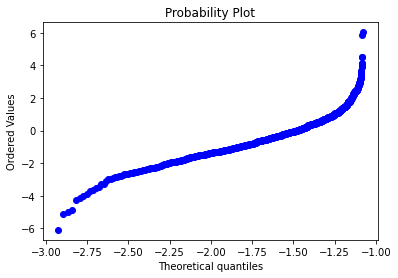

In [74]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()